In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [6]:
df1 = pd.read_csv("Mumbai House Prices.csv")
df1.head(10) #Dataset

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
5,2,Apartment,Bhoomi Simana Wing A Phase 1,826,3.30,Cr,Parel,Under Construction,New
6,5,Villa,Agami Estancia,2921,1.99,Cr,Boisar,Under Construction,New
7,3,Apartment,Sanghvi Infenia,778,2.89,Cr,Santacruz East,Under Construction,New
8,1,Apartment,Shubh Shreeji Heights,396,29.84,L,Badlapur East,Ready to move,New
9,2,Apartment,Aplite Greenstone Heritage,671,2.72,Cr,Fort,Under Construction,New


In [7]:
df1.shape

(76038, 9)

In [8]:
df1.groupby('type')['type'].agg('count') #Counting the numbers of entries in each columns of the dataset

type
Apartment            74854
Independent House       73
Penthouse                3
Studio Apartment       882
Villa                  226
Name: type, dtype: int64

In [9]:
df3 = df1.drop(['type' , 'status' , 'age'],axis='columns') # Dropping the unnecessary columns
df3.head(10)

,bhk,locality,area,price,price_unit,region
0,3,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West
1,2,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East
2,2,Romell Serene,610,1.73,Cr,Borivali West
3,2,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel
4,2,Origin Oriana,659,94.11,L,Mira Road East
5,2,Bhoomi Simana Wing A Phase 1,826,3.30,Cr,Parel
6,5,Agami Estancia,2921,1.99,Cr,Boisar
7,3,Sanghvi Infenia,778,2.89,Cr,Santacruz East
8,1,Shubh Shreeji Heights,396,29.84,L,Badlapur East
9,2,Aplite Greenstone Heritage,671,2.72,Cr,Fort


In [10]:
df3.isnull().sum() # checking for the null values anywhere in the dataset

bhk           0
locality      0
area          0
price         0
price_unit    0
region        0
dtype: int64

In [11]:
df3['bhk'].unique() #Analyzing the uniques BHK values present in the dataset

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7], dtype=int64)

In [12]:
df3[df3.bhk>7] #Checking how many entries in the dataset are present where the houses are more than 7 BHK

,bhk,locality,area,price,price_unit,region
3038,9,Tridhaatu Tridhaatu Aranya,5500,23.13,Cr,Deonar
8134,8,Ajmera Treon,3285,8.50,Cr,Wadala
8453,9,Reputed Builder Varsha Apartments,6350,34.00,Cr,Juhu
8454,10,Reputed Builder Varsha Apartments,6200,33.00,Cr,Juhu
8455,10,Reputed Builder Avighna,6500,35.00,Cr,Chembur
8557,8,Reputed Builder Atlantis,7800,25.00,Cr,Kharghar
8559,9,Parthenon Raiaskaran,8500,30.00,Cr,Andheri West
11846,9,Reputed Builder Ram Niwas,7000,36.00,Cr,Kandivali West
17186,8,Reputed Builder Sangeeta Apartments,5400,27.00,Cr,Chembur
19009,8,Sheth Vasant Oasis,3700,9.85,Cr,Andheri East


In [13]:
df3.area.unique() #Analyzing the Areas of houses present in the datase

array([ 685,  640,  610, ..., 1974, 1634, 3049], dtype=int64)

In [14]:
df3.price_unit.unique() 

array(['Cr', 'L'], dtype=object)

In [ ]:
# Making the price unit common as 'Lakh' so as to ease the computation ahead
df3['house_price'] = df3['price'].astype(str) + df3['price_unit']

for index , row in df3.iterrows():
    if 'Cr' in row['price_unit']:
        df3.at[index,'house_price'] = float(row['price'])*100
    elif 'L' in row['price_unit']:
        df3.at[index,'house_price'] = float(row['price'])
        
df3.drop(columns=['price','price_unit'],inplace=True)
df3.rename(columns={'house_price': 'price_in_lakh'},inplace=True)

df3

In [16]:
#Adding the column price_per_sqft for the price prediction
df4 = df3.copy()
df4['price_per_sqft'] = df4['price_in_lakh']*100000/df4['area']
df4.head(10)

,bhk,locality,area,region,price_in_lakh,price_per_sqft
0,3,Lak And Hanware The Residency Tower,685,Andheri West,250.0,36496.350365
1,2,Radheya Sai Enclave Building No 2,640,Naigaon East,52.51,8204.6875
2,2,Romell Serene,610,Borivali West,173.0,28360.655738
3,2,Soundlines Codename Urban Rainforest,876,Panvel,59.98,6847.031963
4,2,Origin Oriana,659,Mira Road East,94.11,14280.728376
5,2,Bhoomi Simana Wing A Phase 1,826,Parel,330.0,39951.57385
6,5,Agami Estancia,2921,Boisar,199.0,6812.735365
7,3,Sanghvi Infenia,778,Santacruz East,289.0,37146.529563
8,1,Shubh Shreeji Heights,396,Badlapur East,29.84,7535.353535
9,2,Aplite Greenstone Heritage,671,Fort,272.0,40536.512668


In [17]:
len(df4.locality.unique())

9782

In [18]:
#Merging the Locality column and city column into one column 'location'
df4['location'] = df4['locality']+', '+df4['region']
df4.drop(columns=['locality' , 'region'],inplace=True)
df4.head(10)

,bhk,area,price_in_lakh,price_per_sqft,location
0,3,685,250.0,36496.350365,"Lak And Hanware The Residency Tower, Andheri West"
1,2,640,52.51,8204.6875,"Radheya Sai Enclave Building No 2, Naigaon East"
2,2,610,173.0,28360.655738,"Romell Serene, Borivali West"
3,2,876,59.98,6847.031963,"Soundlines Codename Urban Rainforest, Panvel"
4,2,659,94.11,14280.728376,"Origin Oriana, Mira Road East"
5,2,826,330.0,39951.57385,"Bhoomi Simana Wing A Phase 1, Parel"
6,5,2921,199.0,6812.735365,"Agami Estancia, Boisar"
7,3,778,289.0,37146.529563,"Sanghvi Infenia, Santacruz East"
8,1,396,29.84,7535.353535,"Shubh Shreeji Heights, Badlapur East"
9,2,671,272.0,40536.512668,"Aplite Greenstone Heritage, Fort"


In [19]:
df4.head(10)

,bhk,area,price_in_lakh,price_per_sqft,location
0,3,685,250.0,36496.350365,"Lak And Hanware The Residency Tower, Andheri West"
1,2,640,52.51,8204.6875,"Radheya Sai Enclave Building No 2, Naigaon East"
2,2,610,173.0,28360.655738,"Romell Serene, Borivali West"
3,2,876,59.98,6847.031963,"Soundlines Codename Urban Rainforest, Panvel"
4,2,659,94.11,14280.728376,"Origin Oriana, Mira Road East"
5,2,826,330.0,39951.57385,"Bhoomi Simana Wing A Phase 1, Parel"
6,5,2921,199.0,6812.735365,"Agami Estancia, Boisar"
7,3,778,289.0,37146.529563,"Sanghvi Infenia, Santacruz East"
8,1,396,29.84,7535.353535,"Shubh Shreeji Heights, Badlapur East"
9,2,671,272.0,40536.512668,"Aplite Greenstone Heritage, Fort"


In [20]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats

location
Hiranandani Meadows, Thane West                                      861
Sheth Avalon, Thane West                                             516
T Bhimjyani The Verraton, Thane West                                 499
ACME Ozone Phase 2, Thane West                                       467
Runwal Gardens, Dombivali                                            389
                                                                    ... 
Reputed Builder Jay Vijay Co Op Housing Society, Ville Parle East      1
Reputed Builder Jay Shastri Nagar Housing Limited, Mulund West         1
Reputed Builder Jay Shankar Apartment, Malad West                      1
Reputed Builder Jay Ganesh CHS, Kalyan West                            1
Zoeb Aayesha Palace, Parel                                             1
Name: location, Length: 9842, dtype: int64

In [21]:
len(location_stats[location_stats<=5 ])

7273

In [22]:
location_stats_less_than_5 = location_stats[location_stats<=5]
location_stats_less_than_5

location
Swaraj Homes Balaji Niwas Apartments, Kamothe                        5
Landmark Anand Paradise, Bhayandar East                              5
Rustomjee Urbania Aurelia 1, Thane West                              5
Swami Samarth Srishti Phase 2 Wing A, Bhandup West                   5
Poddar Wondercity Phase II, Badlapur East                            5
                                                                    ..
Reputed Builder Jay Vijay Co Op Housing Society, Ville Parle East    1
Reputed Builder Jay Shastri Nagar Housing Limited, Mulund West       1
Reputed Builder Jay Shankar Apartment, Malad West                    1
Reputed Builder Jay Ganesh CHS, Kalyan West                          1
Zoeb Aayesha Palace, Parel                                           1
Name: location, Length: 7273, dtype: int64

In [23]:
len(df4.location.unique())

9842

In [24]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_5 else x)
len(df4.location.unique())

2570

In [25]:
df4.head(10)

,bhk,area,price_in_lakh,price_per_sqft,location
0,3,685,250.0,36496.350365,"Lak And Hanware The Residency Tower, Andheri West"
1,2,640,52.51,8204.6875,"Radheya Sai Enclave Building No 2, Naigaon East"
2,2,610,173.0,28360.655738,"Romell Serene, Borivali West"
3,2,876,59.98,6847.031963,other
4,2,659,94.11,14280.728376,"Origin Oriana, Mira Road East"
5,2,826,330.0,39951.57385,"Bhoomi Simana Wing A Phase 1, Parel"
6,5,2921,199.0,6812.735365,other
7,3,778,289.0,37146.529563,"Sanghvi Infenia, Santacruz East"
8,1,396,29.84,7535.353535,"Shubh Shreeji Heights, Badlapur East"
9,2,671,272.0,40536.512668,other


In [26]:
df4[df4.area/df4.bhk<300].head()

,bhk,area,price_in_lakh,price_per_sqft,location
0,3,685,250.0,36496.350365,"Lak And Hanware The Residency Tower, Andheri West"
7,3,778,289.0,37146.529563,"Sanghvi Infenia, Santacruz East"
12,3,753,177.0,23505.976096,"Aayush Gulmohar, Chembur"
18,2,555,142.0,25585.585586,"Raymond Raymond Realty TenX Habitat, Thane West"
20,2,582,149.0,25601.37457,"Mayfair The View, Vikhroli"


In [27]:
df4.price_per_sqft.describe()

count     76038.0
unique    29489.0
top       10000.0
freq        409.0
Name: price_per_sqft, dtype: float64

In [28]:
df4.price_per_sqft.min()

646.7661691542288

In [29]:
df4.price_per_sqft.max()

182307.6923076923

In [30]:
df4.price_per_sqft.mean()

15118.812073626888

In [31]:
df4.price_per_sqft.std()

9332.899565077736

In [32]:
df4.shape

(76038, 5)

In [33]:
#removing outliers if any present
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [34]:
df5 = remove_pps_outliers(df4)
df5.shape

(56487, 5)

In [35]:
#Checking for the prices are correctly represented as the price of 2BHK flat should be higher than the price of 1BHK flat
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)& (df.bhk==2)]
    bhk3 = df[(df.location==location)& (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price_in_lakh,color='blue',label='2 BHK',marker='+',s=50)
    plt.scatter(bhk3.area,bhk3.price_in_lakh,color='red',label='3 BHK',marker='*',s=50)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    


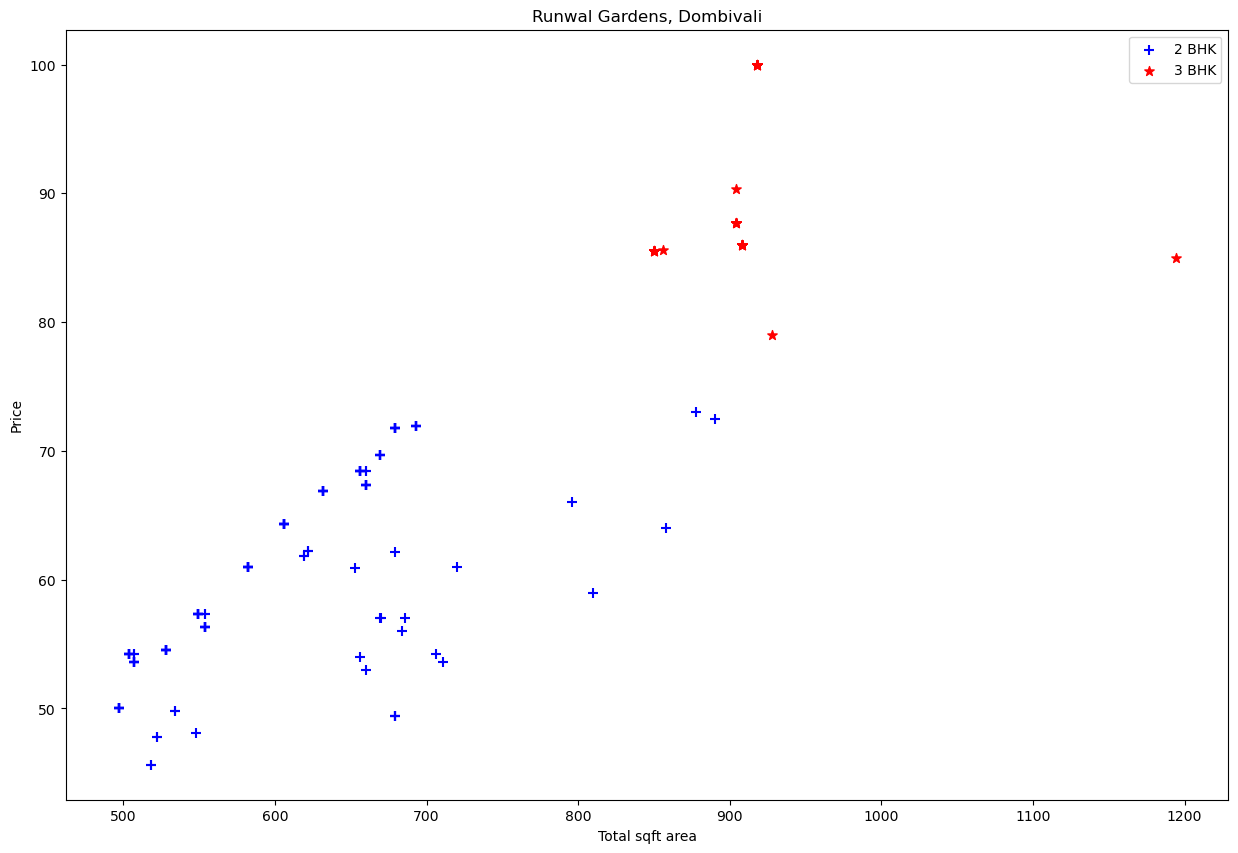

In [36]:
plot_scatter_chart(df5,'Runwal Gardens, Dombivali')

Text(0, 0.5, 'Count')

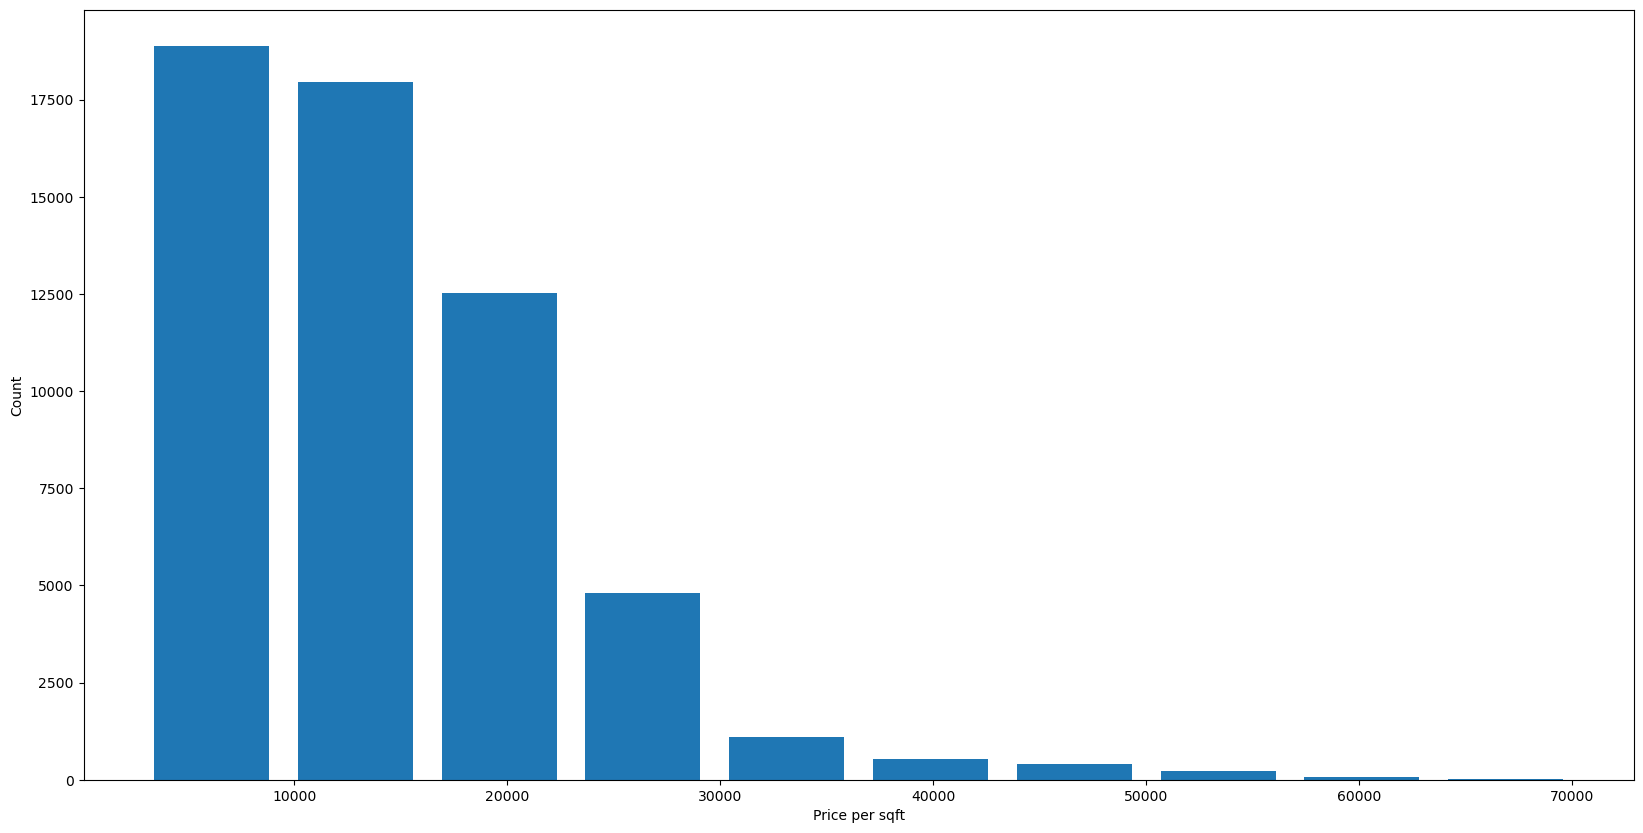

In [37]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [38]:
df7 = df5.drop(['price_per_sqft'],axis='columns')
df7.head(5)

,bhk,area,price_in_lakh,location
0,2,887,126.0,"3 Aces The Signature Tower, Vikhroli"
1,2,806,114.0,"3 Aces The Signature Tower, Vikhroli"
2,2,815,122.0,"3 Aces The Signature Tower, Vikhroli"
3,2,1040,57.2,"365 Days Majestic Planet, Taloja"
4,2,1040,57.2,"365 Days Majestic Planet, Taloja"


In [39]:
df7.shape

(56487, 4)

In [40]:
#Encoding the location as it is text and we need number to train the model
dummies=pd.get_dummies(df7.location).astype(int)
dummies.head(3)

,"3 Aces The Signature Tower, Vikhroli","365 Days Majestic Planet, Taloja","5P Bhagwati Heritage, Sector 21 Kamothe","5th Prasanna Aura, Chembur","A And O A And O Excellente, Mulund West","A And O A O FResidences Malad, Malad East","A And O Eminente, Dahisar","A And O F Residences, Malad East","A H A H Sapphire, Mira Road East","A Plus Golden Veda, Badlapur West",...,"YS Sarth Apartment, Karjat","Yash Dahisar Shivangan Wing A, Dahisar","Yash Dahisar Shivangan, Dahisar","Yash Jayesh Shah Enviro Affinity, Mira Road East","Yash Orion, Goregaon East","Yashvi Pride, Vasai","Yogi Ajmera Bliss, Kalyan West","Yogsiddhi Sumukh Hills, Kandivali East","Zire The Kollage, Andheri East",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#drop the values 'others' from the location columns as they are not impacting the price prediction so far
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head(5)

,bhk,area,price_in_lakh,location,"3 Aces The Signature Tower, Vikhroli","365 Days Majestic Planet, Taloja","5P Bhagwati Heritage, Sector 21 Kamothe","5th Prasanna Aura, Chembur","A And O A And O Excellente, Mulund West","A And O A O FResidences Malad, Malad East",...,"Y K and Sons Yashwant Avenue, Virar","YS Sarth Apartment, Karjat","Yash Dahisar Shivangan Wing A, Dahisar","Yash Dahisar Shivangan, Dahisar","Yash Jayesh Shah Enviro Affinity, Mira Road East","Yash Orion, Goregaon East","Yashvi Pride, Vasai","Yogi Ajmera Bliss, Kalyan West","Yogsiddhi Sumukh Hills, Kandivali East","Zire The Kollage, Andheri East"
0,2,887,126.0,"3 Aces The Signature Tower, Vikhroli",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,806,114.0,"3 Aces The Signature Tower, Vikhroli",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,815,122.0,"3 Aces The Signature Tower, Vikhroli",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1040,57.2,"365 Days Majestic Planet, Taloja",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1040,57.2,"365 Days Majestic Planet, Taloja",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df8.shape

(56487, 2553)

In [43]:
df9 = df8.drop('location',axis='columns')
df9.head(5)

,bhk,area,price_in_lakh,"3 Aces The Signature Tower, Vikhroli","365 Days Majestic Planet, Taloja","5P Bhagwati Heritage, Sector 21 Kamothe","5th Prasanna Aura, Chembur","A And O A And O Excellente, Mulund West","A And O A O FResidences Malad, Malad East","A And O Eminente, Dahisar",...,"Y K and Sons Yashwant Avenue, Virar","YS Sarth Apartment, Karjat","Yash Dahisar Shivangan Wing A, Dahisar","Yash Dahisar Shivangan, Dahisar","Yash Jayesh Shah Enviro Affinity, Mira Road East","Yash Orion, Goregaon East","Yashvi Pride, Vasai","Yogi Ajmera Bliss, Kalyan West","Yogsiddhi Sumukh Hills, Kandivali East","Zire The Kollage, Andheri East"
0,2,887,126.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,806,114.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,815,122.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1040,57.2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1040,57.2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df9.shape

(56487, 2552)

In [45]:
X = df9.drop('price_in_lakh',axis='columns')
X.head()

,bhk,area,"3 Aces The Signature Tower, Vikhroli","365 Days Majestic Planet, Taloja","5P Bhagwati Heritage, Sector 21 Kamothe","5th Prasanna Aura, Chembur","A And O A And O Excellente, Mulund West","A And O A O FResidences Malad, Malad East","A And O Eminente, Dahisar","A And O F Residences, Malad East",...,"Y K and Sons Yashwant Avenue, Virar","YS Sarth Apartment, Karjat","Yash Dahisar Shivangan Wing A, Dahisar","Yash Dahisar Shivangan, Dahisar","Yash Jayesh Shah Enviro Affinity, Mira Road East","Yash Orion, Goregaon East","Yashvi Pride, Vasai","Yogi Ajmera Bliss, Kalyan West","Yogsiddhi Sumukh Hills, Kandivali East","Zire The Kollage, Andheri East"
0,2,887,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,806,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,815,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1040,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1040,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Y = df9.price_in_lakh
Y.head()

0    126.0
1    114.0
2    122.0
3     57.2
4     57.2
Name: price_in_lakh, dtype: object

In [47]:
#Making the train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,Y,train_size=0.8,random_state=10)

In [48]:
#training the model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9094447474918786

In [59]:
X_train.head()

,bhk,area,"3 Aces The Signature Tower, Vikhroli","365 Days Majestic Planet, Taloja","5P Bhagwati Heritage, Sector 21 Kamothe","5th Prasanna Aura, Chembur","A And O A And O Excellente, Mulund West","A And O A O FResidences Malad, Malad East","A And O Eminente, Dahisar","A And O F Residences, Malad East",...,"Y K and Sons Yashwant Avenue, Virar","YS Sarth Apartment, Karjat","Yash Dahisar Shivangan Wing A, Dahisar","Yash Dahisar Shivangan, Dahisar","Yash Jayesh Shah Enviro Affinity, Mira Road East","Yash Orion, Goregaon East","Yashvi Pride, Vasai","Yogi Ajmera Bliss, Kalyan West","Yogsiddhi Sumukh Hills, Kandivali East","Zire The Kollage, Andheri East"
50781,2,690,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3600,2,1100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42419,1,435,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15617,3,2150,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5508,4,1320,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

In [68]:
#Predicting the prices for diffrent location, area , BHK
def predict_price(location,sqft,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [51]:
X.columns

Index(['bhk', 'area', '3 Aces The Signature Tower, Vikhroli',
       '365 Days Majestic Planet, Taloja',
       '5P Bhagwati Heritage, Sector 21 Kamothe', '5th Prasanna Aura, Chembur',
       'A And O A And O Excellente, Mulund West',
       'A And O A O FResidences Malad, Malad East',
       'A And O Eminente, Dahisar', 'A And O F Residences, Malad East',
       ...
       'Y K and Sons Yashwant Avenue, Virar', 'YS Sarth Apartment, Karjat',
       'Yash Dahisar Shivangan Wing A, Dahisar',
       'Yash Dahisar Shivangan, Dahisar',
       'Yash Jayesh Shah Enviro Affinity, Mira Road East',
       'Yash Orion, Goregaon East', 'Yashvi Pride, Vasai',
       'Yogi Ajmera Bliss, Kalyan West',
       'Yogsiddhi Sumukh Hills, Kandivali East',
       'Zire The Kollage, Andheri East'],
      dtype='object', length=2551)

In [ ]:
predict_price('365 Days Majestic Planet, Taloja',500,1)